In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

## Association

### Bookstore example

In [3]:
# First, we'll build a structural causal model (SCM)
class BookSCM:
    
    def __init__(self, random_seed=None):
        self.random_seed = random_seed
        self.u_0 = stats.uniform()
        self.u_1 = stats.norm()
        
    def sample(self, sample_size=100):
        """Samples from the SCM"""
        if self.random_seed:
            np.random.seed(self.random_seed)
        
        u_0 = self.u_0.rvs(sample_size)
        u_1 = self.u_1.rvs(sample_size)
        a = u_0 > .61
        b = (a + .5 * u_1) > .2
        
        return a, b

In [4]:
# Let's initialize our SCM
scm = BookSCM(random_seed=45)

In [5]:
# ...and sample from it
buy_book_a, buy_book_b = scm.sample(100)

In [6]:
buy_book_a

array([ True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True, False,  True,  True, False,  True,
        True])

In [7]:
buy_book_b

array([False, False,  True,  True, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True])

In [8]:
np.where(buy_book_b, buy_book_a, 0).sum()

37

In [9]:
# Sanity check
# if b is true and a is true, then 1 otherwise 0
np.where(buy_book_b, buy_book_a, 0)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [10]:
# Let's compute probabilities
proba_book_a = buy_book_a.sum() / buy_book_a.shape[0]
proba_book_b = buy_book_b.sum() / buy_book_b.shape[0]

print(f'Probability of buying book A: {proba_book_a:0.3f}')
print(f'Probability of buying book B: {proba_book_b:0.3f}')

# ...and conditional probailities
proba_book_a_given_book_b = np.where(buy_book_b, buy_book_a, 0).sum() / buy_book_b.sum()
proba_book_b_given_book_a = np.where(buy_book_a, buy_book_b, 0).sum() / buy_book_a.sum()

print(f'Probability of buying book A given B: {proba_book_a_given_book_b:0.3f}')
print(f'Probability of buying book B given A: {proba_book_b_given_book_a:0.3f}')

Probability of buying book A: 0.390
Probability of buying book B: 0.580
Probability of buying book A given B: 0.638
Probability of buying book B given A: 0.949


## Intervention

We will use Pearson correlation coefficient and p-value for testing non-correlation to prove how intervention change the system
<br>
<br>
It returns Pearson product-moment correlation coefficient (-1 ~ +1 with 0 implying no correlation) and p-value
<br>
<br>
If p-value > 0.05 0r > 0.01, we accept the null hypothesis
"the distributions underlying the samples are uncorrelated and normally distributed"

In [11]:
SAMPLE_SIZE = 100

np.random.seed(45)

u_0 = np.random.randn(SAMPLE_SIZE)
u_1 = np.random.randn(SAMPLE_SIZE)
a = u_0
b = 5 * a + u_1

r, p = stats.pearsonr(a, b)

print(f'Mean of B before any intervention: {b.mean():.3f}')
print(f'Variance of B before any intervention: {b.var():.3f}')
print(f'Correlation between A and B:\nr = {r:.3f}; p = {p:.3f}\n')

a = np.array([1.5] * SAMPLE_SIZE)
b = 5 * a + u_1

print(f'Mean of B after the intervention on A: {b.mean():.3f}')
print(f'Variance of B after the intervention on A: {b.var():.3f}\n')

a = u_0
b = np.random.randn(SAMPLE_SIZE)

r, p = stats.pearsonr(a, b)

print(f'Mean of B after the intervention on B: {b.mean():.3f}')
print(f'Variance of B after the intervention on B: {b.var():.3f}')
print(f'Correlation between A and B after intervening on B:\nr = {r:.3f}; p = {p:.3f}\n')

Mean of B before any intervention: -0.620
Variance of B before any intervention: 22.667
Correlation between A and B:
r = 0.978; p = 0.000

Mean of B after the intervention on A: 7.575
Variance of B after the intervention on A: 1.003

Mean of B after the intervention on B: 0.186
Variance of B after the intervention on B: 0.995
Correlation between A and B after intervening on B:
r = -0.023; p = 0.821



## Counterfactuals

We'll use the following SCM:

$$\large Y := TU + (T-1)(U-1)$$

In [12]:
class CounterfactualSCM:
    
    def abduct(self, t, y):
        return (t + y - 1)/(2*t - 1)
    
    def modify(self, t):
        return lambda u: t * u + (t - 1) * (u - 1)
        
    def predict(self, u, t):
        return self.modify(t)(u)

In [13]:
coffee = CounterfactualSCM()
t = 1
y = 1

In [14]:
u = coffee.abduct(t=t, y=y)
u

1.0

In [15]:
coffee.predict(u=u, t=0)

0.0

## Causation without correlation - plots

### Non-monotonic case

In [16]:
x = np.random.uniform(-2, 2, 5000)
y = x**2 + 0.2*np.random.randn(len(x))

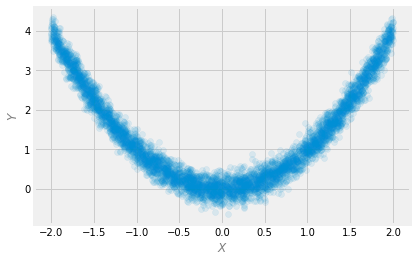

In [17]:
plt.scatter(x, y, alpha=.1)
plt.xlabel('$X$', alpha=.5)
plt.ylabel('$Y$', alpha=.5)
plt.show()

### Null Hypothesis for The Spearman rank-order correlation coefficient:
"Two samples have no ordinal correlation."
<br>
<br>
if p > 0.05 or 0.01, we accept the null hypothesis
<br>
<br>
It returns correlation coefficient (-1~1, 0 means no correlation) and p value

In [18]:
# Correlation coefficient
stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.017571125214845006, pvalue=0.21414381254206408)